In [174]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv("titanic.csv")

In [176]:
print(df.sample(5))
print(df.head())
print(df.tail())

     PassengerId  Survived  Pclass  \
25            26         1       3   
663          664         0       3   
424          425         0       3   
99           100         0       2   
319          320         1       1   

                                                  Name     Sex   Age  SibSp  \
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
663                                   Coleff, Mr. Peju    male  36.0      0   
424                        Rosblom, Mr. Viktor Richard    male  18.0      1   
99                                   Kantor, Mr. Sinai    male  34.0      1   
319  Spedden, Mrs. Frederic Oakley (Margaretta Corn...  female  40.0      1   

     Parch  Ticket      Fare Cabin Embarked  
25       5  347077   31.3875   NaN        S  
663      0  349210    7.4958   NaN        S  
424      1  370129   20.2125   NaN        S  
99       0  244367   26.0000   NaN        S  
319      1   16966  134.5000   E34        C  
   PassengerId  Surv

In [177]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [178]:
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)

In [179]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [180]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin']=df['Cabin'].ffill()
df['Embarked']=df['Embarked'].ffill()
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)


In [182]:
df.size

8019

In [183]:
df.shape

(891, 9)

In [184]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'] = df['Embarked'].cat.codes

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
df[['Age', 'Fare']] = MaxAbsScaler().fit_transform(df[['Age', 'Fare']])


In [186]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
491,0,3,1,21.0,0,0,7.2500,B37,2
427,1,2,0,19.0,0,0,26.0000,C78,2
525,0,3,1,40.5,0,0,7.7500,B18,1
406,0,3,1,51.0,0,0,7.7500,G6,2
496,1,1,0,54.0,1,0,78.2667,D20,0
180,0,3,0,28.0,8,2,69.5500,C49,2
182,0,3,1,9.0,4,2,31.3875,C49,2
400,1,3,1,39.0,0,0,7.9250,G6,2
545,0,1,1,64.0,0,0,26.0000,C86,2
793,0,1,1,28.0,0,0,30.6958,B82 B84,0


 Single Variable Histograms (Numerical Columns)

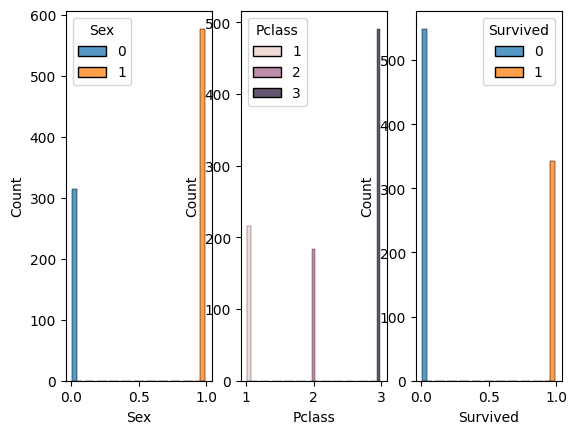

In [187]:
fig, axis = plt.subplots(1,3)
sns.histplot(ax = axis[0], data = df, x='Sex', hue = 'Sex', multiple = 'dodge', shrink = 0.8)
sns.histplot(ax = axis[1], data = df, x='Pclass', hue = 'Pclass',multiple = 'dodge', shrink = 0.8)
sns.histplot(ax = axis[2], data = df, x='Survived', hue = 'Survived', multiple = 'dodge', shrink = 0.8)
plt.show()


Two-Variable Histograms (Categorical x Survived)

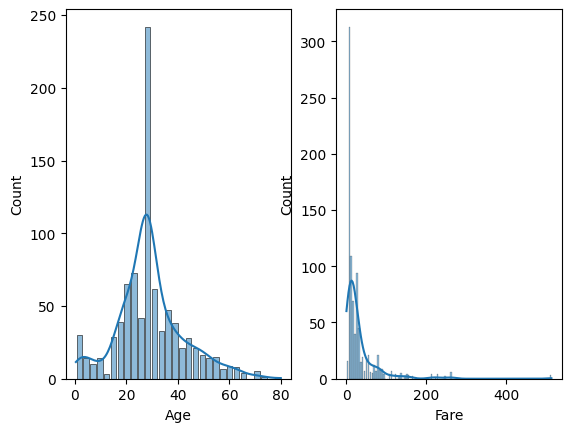

In [188]:
fig, axis = plt.subplots(1,2)
sns.histplot(ax = axis[0], data = df, x='Age', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax = axis[1], data = df, x='Fare', multiple = 'dodge', shrink = 0.8, kde = True)
plt.show()


Two-Variable Histograms (Sex vs Age/Fare and Survived vs Age/Fare)

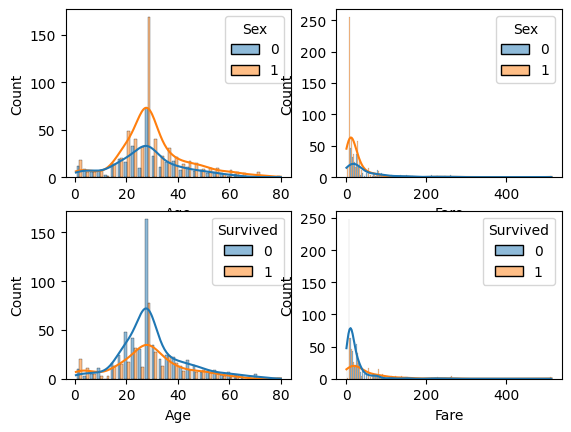

In [189]:
fig, axis = plt.subplots(2,2)
sns.histplot(ax = axis[0,0], data = df, x='Age', hue = 'Sex', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax = axis[0,1], data = df, x='Fare', hue = 'Sex', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax=axis[1,0], data = df, x='Age', hue = 'Survived', multiple = 'dodge',shrink=0.8, kde= True)
sns.histplot(ax = axis[1,1], data = df, x='Fare', hue='Survived', multiple='dodge', shrink=0.8, kde = True)
plt.show()
